In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pandas as pd
from skimage import io
from shutil import copyfile
import sys
import time
from keras.preprocessing.image import load_img, img_to_array
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ecbff9896d49d092f3863ad73c1d7f511f3e599c2602931d6bceaa2b26916f13
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
url = 'https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv'
filename = wget.download(url)

In [ ]:
url = 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv'
filename = wget.download(url)

In [ ]:
url = 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv'
filename = wget.download(url)

In [ ]:
images_boxable_file = 'train-images-boxable-with-rotation.csv'
annotations_bbox_file = 'train-annotations-bbox.csv'
class_descriptions_file = 'class-descriptions-boxable.csv'

In [ ]:
images_boxable = pd.read_csv(images_boxable_file)
images_boxable.head(3)

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0


In [ ]:
annotations_bbox = pd.read_csv(annotations_bbox_file)
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [ ]:
class_descriptions = pd.read_csv(class_descriptions_file, header=None)
class_descriptions.head()

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [ ]:
def plot_bbox(img_id):
  img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      class_series = class_descriptions[class_descriptions[0]==label_name]
      class_name = class_series[1].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Image: (3508, 2480, 3)
Coordinates: (359, 1179), (2192, 3233)


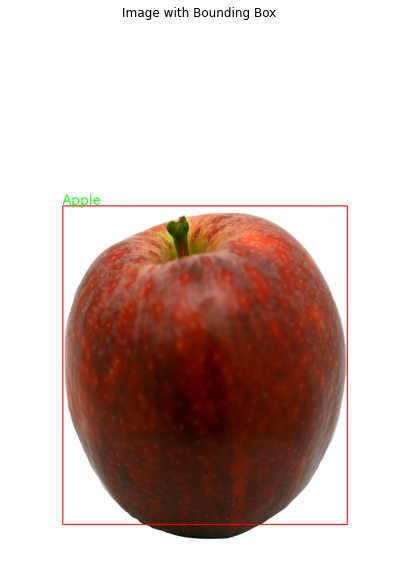

Image: (2848, 4288, 3)
Coordinates: (0, 8), (4285, 2845)


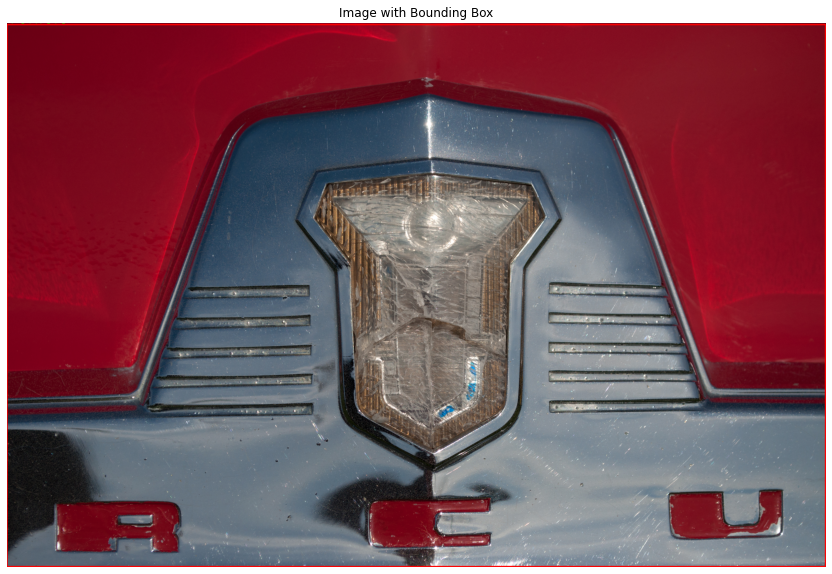

Image: (3150, 3252, 3)
Coordinates: (569, 345), (2802, 2861)


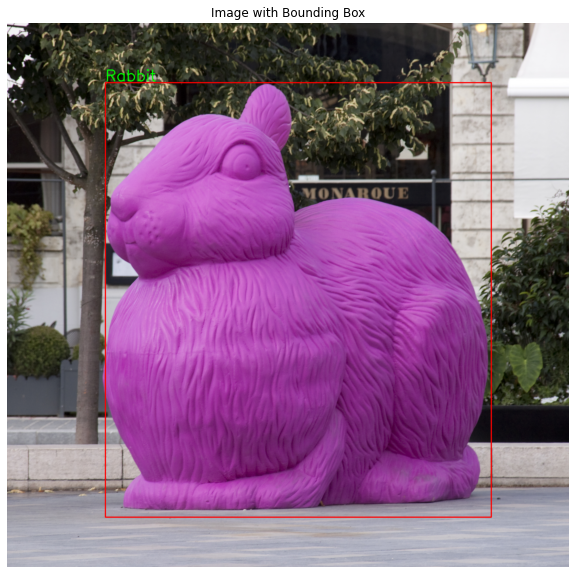

In [ ]:
#Creating random sample list for display
random_img_ids = annotations_bbox["ImageID"].value_counts().tail(50).index.values
for img_id in random.sample(list(random_img_ids), 3):
  plot_bbox(img_id)

In [ ]:
table = class_descriptions[class_descriptions[1]=='Table'] 
chair = class_descriptions[class_descriptions[1]=='Chair']
person = class_descriptions[class_descriptions[1]=='Person']
laptop = class_descriptions[class_descriptions[1]=='Laptop']

In [ ]:
label_table = table[0].values[0]
label_chair = chair[0].values[0]
label_person = person[0].values[0]
label_laptop = laptop[0].values[0]
label_laptop

'/m/01c648'

In [ ]:
bbox_table = annotations_bbox[annotations_bbox["LabelName"]==label_table]
bbox_chair = annotations_bbox[annotations_bbox["LabelName"]==label_chair]
bbox_person = annotations_bbox[annotations_bbox["LabelName"]==label_person]
bbox_laptop = annotations_bbox[annotations_bbox["LabelName"]==label_laptop]

In [ ]:
bbox_laptop.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
583,000060e3121c7305,xclick,/m/01c648,1,0.322500,0.389375,0.580131,0.669166,0,0,0,0,0
3539,00022a6311159428,xclick,/m/01c648,1,0.126875,0.484375,0.638281,0.871094,0,0,0,0,0
4018,0002af997ecdfcf4,xclick,/m/01c648,1,0.250000,0.363750,0.236667,0.334444,0,0,0,0,0
5473,000396ae942e8778,xclick,/m/01c648,1,0.000000,0.995000,0.000000,0.996390,0,0,0,0,0
6449,00048edce2a37368,xclick,/m/01c648,1,0.000000,0.225000,0.710000,0.999167,1,1,0,0,0


In [ ]:
print(len(bbox_table))
print(len(bbox_chair))
print(len(bbox_person))
print(len(bbox_laptop))

85691
132483
1034721
9327


In [ ]:
table_img_id = bbox_table['ImageID']
chair_img_id = bbox_chair['ImageID']
person_img_id = bbox_person['ImageID']
laptop_img_id = bbox_laptop['ImageID']

In [ ]:
n=50
subset_table_id = random.sample(list(table_img_id), n)
subset_chair_id = random.sample(list(chair_img_id), n)
subset_person_id = random.sample(list(person_img_id), n)
subset_laptop_id = random.sample(list(laptop_img_id), n)

In [ ]:
subtable_pd = images_boxable.loc[images_boxable["ImageID"].isin(subset_table_id)]
subchair_pd = images_boxable.loc[images_boxable["ImageID"].isin(subset_chair_id)]
subperson_pd = images_boxable.loc[images_boxable["ImageID"].isin(subset_person_id)]
sublaptop_pd = images_boxable.loc[images_boxable["ImageID"].isin(subset_laptop_id)]
sublaptop_pd.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
57030,b2eeefb6fc3a34af,train,https://c8.staticflickr.com/4/3143/2388813033_...,https://www.flickr.com/photos/bojo/2388813033,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/bojo/,Bobbie Johnson,SI Camp: Barcode Wikipedia,47971,92i6w8J2zg1obrsx2LQq0w==,NaN,NaN
69349,a7f43c24d9b0cfe3,train,https://farm4.staticflickr.com/8366/8393457645...,https://www.flickr.com/photos/diloz/8393457645,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/diloz/,Azlan DuPree,Fiera + Izhar / Nikah,596377,6EuP3ATPBAIDsAaC9bxIbg==,https://c8.staticflickr.com/9/8366/8393457645_...,0.0
111073,8b8aa8d257bc7a76,train,https://farm7.staticflickr.com/1008/1465667454...,https://www.flickr.com/photos/niyam/1465667454,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/niyam/,Niyam Bhushan,052.freed.in.2007.JPG,228865,UzK5Ow/Td3/UOVo5/FFbGw==,https://c3.staticflickr.com/2/1008/1465667454_...,0.0
189241,11db2cd49085feaa,train,https://c3.staticflickr.com/4/3291/5717251815_...,https://www.flickr.com/photos/eviltomthai/5717...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/eviltomthai/,Tom Thai,IMG_3553,142462,IYP0vhwo3zcnlmfhfu+4sQ==,https://c7.staticflickr.com/4/3291/5717251815_...,0.0
291795,01a8049734c8d8ae,train,https://c7.staticflickr.com/1/54/163414018_e38...,https://www.flickr.com/photos/midiman/163414018,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/midiman/,midiman,Macbook Pros Ready to Teach,364304,u/+KvWxbfgCUR5OaQzxf1w==,https://c8.staticflickr.com/1/54/163414018_e38...,0.0


In [ ]:
#Setting the index by .set_index and converting Pandas DF to dict by .to_dict()
subtable_dict = subtable_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subchair_dict = subchair_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subperson_dict = subperson_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
sublaptop_dict = sublaptop_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()

In [ ]:
mappings = [subtable_dict, subchair_dict, subperson_dict, sublaptop_dict]
classes = ['Table', 'Chair', 'Person', 'Laptop']

In [ ]:
for idx, obj_type in enumerate(classes):
  issues = 0
  if not os.path.exists(obj_type):
    os.mkdir(obj_type)
  for img_id , url in mappings[idx].items():
    try:
      img = io.imread(url)
      saved_path = os.path.join(obj_type, img_id+".jpg")
      io.imsave(saved_path, img)
    except Exception as e:
      issues = issues + 1
  print(f'Image issues = {issues}')

Image issues = 6
Image issues = 6
Image issues = 2
Image issues = 1


Dataset Format for Faster R-CNN(FileName, Xmin, Xmax, Ymax, Ymin)

In [ ]:
#Training and Testing folders
os.mkdir('train')
os.mkdir('test')
train_path = '/content/train'
test_path = '/content/test'

In [ ]:
for i in range(len(classes)):
    all_imgs = os.listdir(classes[i])
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.shuffle(all_imgs)
    
    limit = int(n*0.8) # 80% data for training and 20% for testing

    train_imgs = all_imgs[:limit]
    test_imgs = all_imgs[limit:]
    
    
    for j in range(len(train_imgs)):
        original_path = os.path.join(classes[i], train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)
    

    for j in range(len(test_imgs)):
        original_path = os.path.join(classes[i], test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)

In [ ]:
train_img_count = os.listdir('/content/train')
print("Number of images in train found: ", len(train_img_count))

Number of images in train found:  160


In [ ]:
test_img_count = os.listdir('/content/test')
print("Number of images in train found: ", len(test_img_count))

Number of images in train found:  25


In [ ]:
label_names = [label_table, label_chair, label_person, label_laptop]

train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                train_df = train_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [ ]:
train_df.head()

,FileName,XMin,XMax,YMin,YMax,ClassName
0,536c40940d7886da.jpg,0.229630,0.443704,0.410000,0.622222,Laptop
1,536c40940d7886da.jpg,0.344444,0.462963,0.356667,0.425556,Laptop
2,536c40940d7886da.jpg,0.559259,0.573333,0.182222,0.228889,Laptop
3,536c40940d7886da.jpg,0.685926,0.759259,0.247778,0.365556,Laptop
4,536c40940d7886da.jpg,0.858519,0.942222,0.214444,0.268889,Laptop


In [ ]:
train_df.shape

(2365, 6)

Image: (900, 1350, 3)
Coordinates: (773, 740), (842, 870)
Coordinates: (310, 369), (599, 559)
Coordinates: (464, 321), (625, 383)
Coordinates: (754, 163), (773, 206)
Coordinates: (926, 223), (1024, 329)
Coordinates: (1159, 192), (1271, 242)
Coordinates: (1267, 206), (1348, 248)
Coordinates: (696, 288), (1340, 899)
Coordinates: (720, 97), (796, 200)
Coordinates: (1243, 129), (1331, 241)
Coordinates: (10, 86), (176, 296)
Coordinates: (21, 144), (387, 547)
Coordinates: (241, 124), (414, 366)
Coordinates: (271, 50), (288, 133)
Coordinates: (322, 88), (484, 321)
Coordinates: (426, 90), (580, 235)
Coordinates: (468, 44), (580, 171)
Coordinates: (580, 63), (684, 162)
Coordinates: (603, 177), (916, 845)
Coordinates: (630, 95), (765, 295)
Coordinates: (859, 50), (1097, 248)
Coordinates: (1131, 117), (1229, 228)


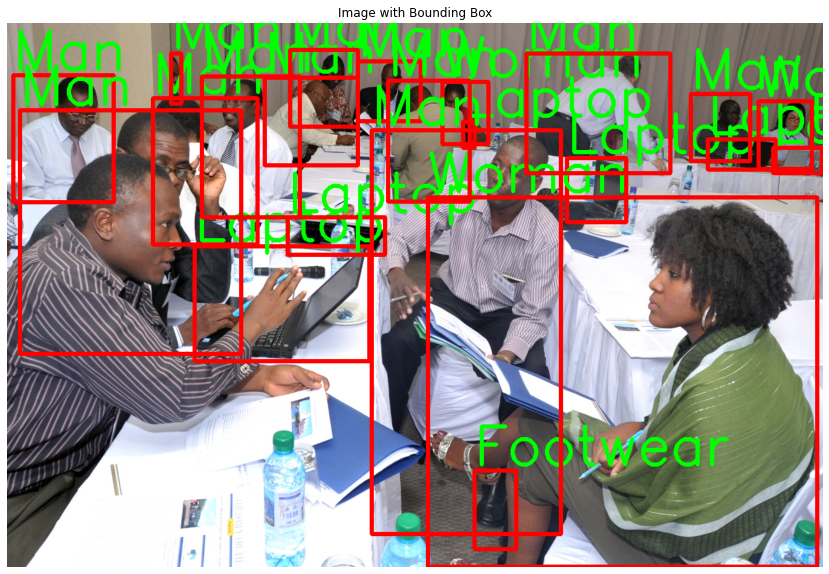

In [ ]:
train_img_ids = train_df["FileName"].head().str.split(".").str[0].unique() # plotting the bounding box
for img_id in train_img_ids:
  plot_bbox(img_id)

In [ ]:
val_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                val_df = val_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [ ]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

In [ ]:
#Write train.csv to annotation.txt

train_df = pd.read_csv('train.csv')

# for training
with open("annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread('train/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      train_file_path = '/content/train'
      fileName = os.path.join(train_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [ ]:
test_df = pd.read_csv('test.csv')

# for test
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread('test/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      test_file_path = '/content/test'
      fileName = os.path.join(test_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')